#instalando libreria fCWT

In [ ]:
!git clone https://github.com/fastlib/fCWT.git

Cloning into 'fCWT'...
remote: Enumerating objects: 705, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 705 (delta 84), reused 70 (delta 68), pack-reused 606 (from 2)
Receiving objects: 100% (705/705), 19.49 MiB | 14.91 MiB/s, done.
Resolving deltas: 100% (426/426), done.


In [ ]:
!pip install fCWT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 28.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fCWT: filename=fcwt-0.1.18-cp311-cp311-linux_x86_64.whl size=4889967 sha256=4645390e81d29b264c1a7e195aa0cd5e10c600d9e76c1323d37ab25a77e128c1
  Stored in directory: /root/.cache/pip/wheels/45/32/fc/c41c3b3da47873dd2e4e65712e62944d6814246c61e0364005
Successfully built fCWT


In [ ]:
import fCWT
import numpy as np
import matplotlib.pyplot as plt

# Generate a 100s syntethic linear chirp signal

In [ ]:
fs = 1000
n = fs*100 #100 seconds
ts = np.arange(n)

#Generate linear chirp
signal = np.sin(2*np.pi*((0.1+(2*ts)/n)*(ts/fs)))



We can use fCWT's boilerplate code to quickly plot the CWT representation of the signal.

**fcwt.plot(signal,fs,f0,f1,fn,nthreads,scaling,fast,norm)**

|Arguments  |Description                |Default value|
|:----------|:--------------------------|:------------|
|signal     |signal to be analyzed      |-            |
|fs         |sampling frequency         |-            |
|f0         |lowest frequency           | lowest frequency possible |
|f1         |highest frequency          | nyquist frequency |
|fn         |number of frequencies      | 100         |
|nthreads   |number of threads to use   | 1 (rule of thumb: use number of cores) |
|scaling    |scaling of frequencies (lin or log)*  | lin         |
|fast       |use optimization plans**    | False       |
|norm       |normalize time-frequency output |True    |

*See section 'Scaling' for more information

**See section 'Optimization plans' for more information

In [ ]:
!apt-get update
!apt-get install libfftw3-single3


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,378 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,675 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu

In [ ]:
from fcwt.boilerplate import plot

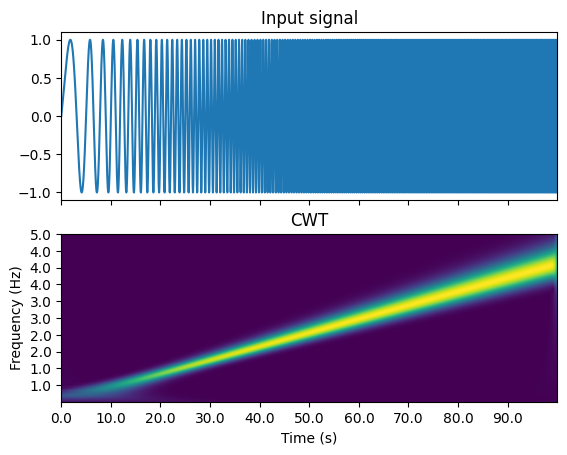

In [ ]:
f0 = 0.1 #lowest frequency
f1 = 5 #highest frequency
fn = 300 #number of frequencies

#plot cwt
plot(signal, fs, f0=f0, f1=f1, fn=fn)

# YA TENGO PINCHANDO LA LIBRERIA FCWT!!!

# Import Python modules

The following Python modules will be used:
- Pandas for manipulation and data extraction from CSV files.
- OS for handling operating system directories and files.
- NumPy for the execution of array and matrixes based math operations.
- Matplotlib for data visualization.
- Scipy for the execution of digital signal processing operations.
- Tensorflow for designing and training deep learning models for data classification.
- PyWavelets for computing wavelet transforms in the wavelet denoising stage
- Denoising for the wavelet denoising algorithm implementation

In [ ]:
! pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.5 MB/s eta 0:00:00


In [ ]:
# Import Python modules

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
import keras
import pywt
import fcwt
import seaborn as sns
import sklearn

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Import custom modules
from denoising import WaveletDenoising

# Load and visualize data samples

Get data from the corresponding directory and organize it in dictionaries for posterior processing. The dataset used for processing and testing the algorithms is the one described in [1].

The directories containing data are:
- Branched: Contains the accelerometer data for the branched topology described in [1]
- Looped: Contains the accelerometer data for the looped topology described in [1]

The variables to specifiy are:
- data_dir: specifies the directory from where to load the data for processing.
- signal_sr: sets the desired sampling rate of the signals.

[1] “Benchmarking dataset for leak detection and localization in water distribution systems,” Data in Brief, vol. 48, p. 109148, Jun. 2023, doi: 10.1016/j.dib.2023.109148.

In [ ]:
# Primero, montar Google Drive (ejecutar solo una vez por sesión)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Directory: /content/drive/MyDrive/Tesis/Accelerometer_Dataset/Branched
Sample Rate: 25600 Hz
Number of signals (training, testing): (960, 240)
Number of labels (training, testing): (960, 240)
Number of samples per signal: 25600


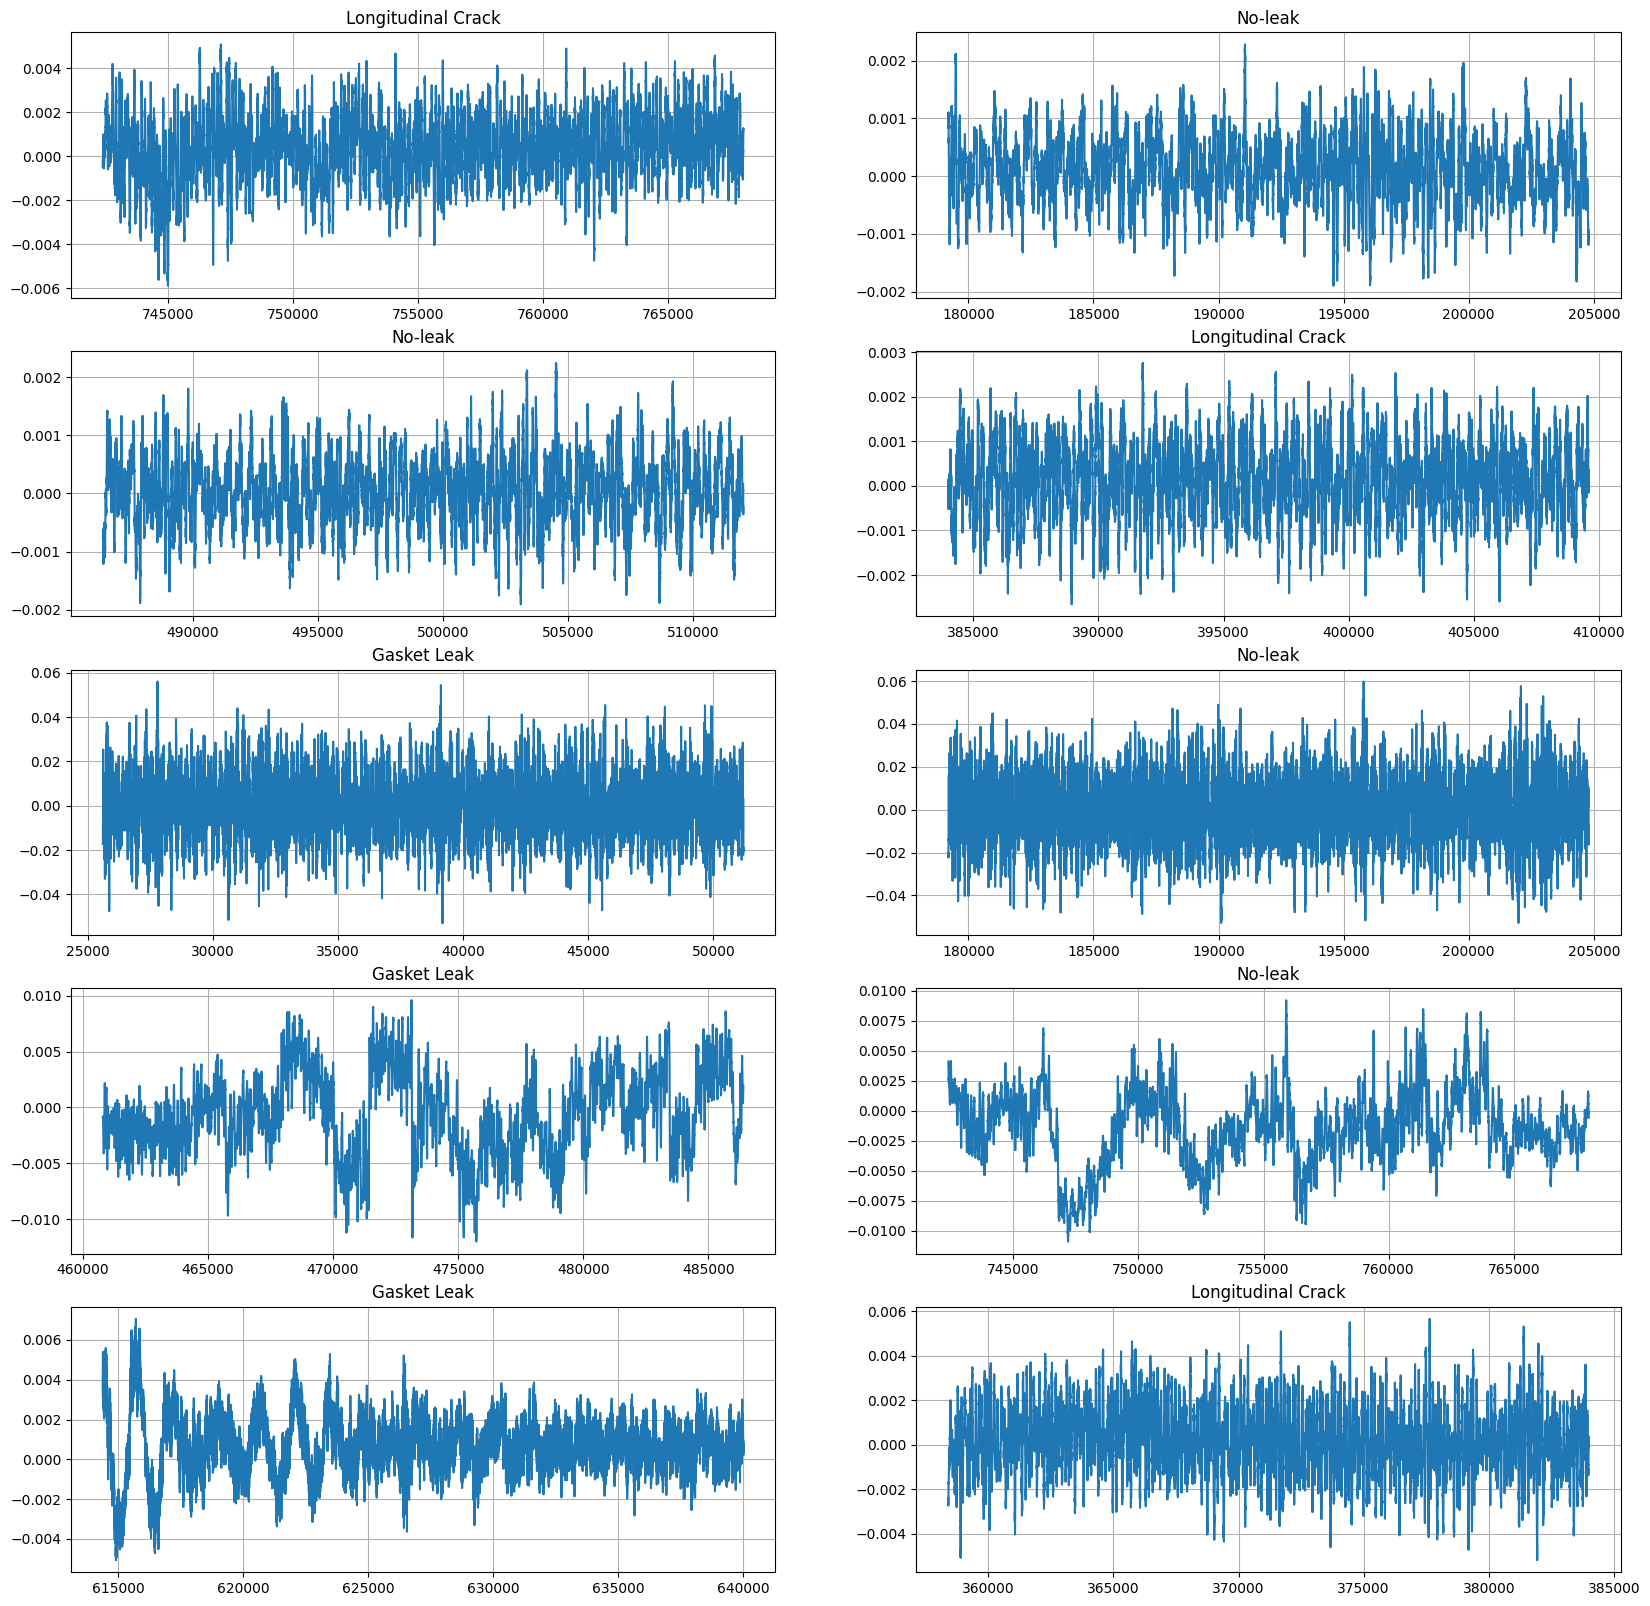

In [ ]:


# Cambiando la ruta para acceder a los datos en Google Drive
data_dir = '/content/drive/MyDrive/Tesis/Accelerometer_Dataset/Branched'
original_sr = 25600 # in Hz
signal_sr = 25600 # in Hz
downsample_factor = original_sr//signal_sr
label_codes_dict = {'Circumferential Crack': 0, 'Gasket Leak': 1, 'Longitudinal Crack': 2, 'No-leak': 3, 'Orifice Leak': 4}
#label_codes_dict = {'Leak': 0, 'No-leak': 1}

# This function gets rid of .DS_Store file if it exists in the defined path.
def remove_DS_store_file(path):
    # Buscar tanto .DS_Store como .DS_store (diferencias de capitalización)
    for ds_name in ['.DS_Store', '.DS_store']:
        ds_store_file_location = os.path.join(path, ds_name)
        if os.path.isfile(ds_store_file_location):
            os.remove(ds_store_file_location)

def load_accelerometer_data(data_dir, sample_rate, downsample_factor, label_codes, fraction_to_include=1):
    # Get rid of .DS_Store file if it exists in data_dir
    remove_DS_store_file(data_dir)

    signals = []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)

        # Verificar que sea un directorio antes de procesarlo
        if not os.path.isdir(label_dir):
            print(f"Omitiendo {label_dir} porque no es un directorio")
            continue

        # Get rid of .DS_Store file if it exists
        remove_DS_store_file(label_dir)

        for file in os.listdir(label_dir):
            file_path = os.path.join(label_dir, file)

            # Opcionalmente, verifica que sea un archivo
            if not os.path.isfile(file_path):
                continue

            # Load the csv file
            accelerometer_signal_df = pd.read_csv(file_path, index_col=False)

            # Downsample by selecting every nth row
            accelerometer_signal_df = accelerometer_signal_df.iloc[::downsample_factor, :]
            accelerometer_signal_df = accelerometer_signal_df.reset_index(drop=True)

            # Get 30 seconds of data
            accelerometer_signal = accelerometer_signal_df['Value'][0:(sample_rate*30)]

            # Generate a vector with the start index for each 1 second frame
            sample_indexes = np.linspace(0,len(accelerometer_signal)-sample_rate,len(accelerometer_signal)//sample_rate)

            # Get the number of signal frames
            signal_frames_number = fraction_to_include*len(sample_indexes)
            signal_frames_counter = 0

            # Generate 1-second signal frames from the original signal
            for signal_frame in sample_indexes:
                accelerometer_signal_frame = accelerometer_signal[int(signal_frame):int(signal_frame+sample_rate)]
                signal_frames_counter+=1

                if signal_frames_counter > signal_frames_number:
                    break

                if len(accelerometer_signal_frame) != sample_rate:
                    continue

                signals.append(accelerometer_signal_frame)
                labels.append(label_codes[label])

    return signals, labels

# Cargar los datos desde Google Drive
signals_lst, labels_lst = load_accelerometer_data(data_dir, signal_sr, downsample_factor, label_codes_dict, fraction_to_include=1)

signals_dict = {'training': [], 'testing': []}
labels_dict = {'training': [], 'testing': []}

# Generate dictionaries with training and testing subsets from the loaded data
signals_dict['training'], signals_dict['testing'], labels_dict['training'], labels_dict['testing'] = train_test_split(signals_lst,
                                                                                                                      labels_lst,
                                                                                                                      test_size=0.2,
                                                                                                                      random_state=53)

# Print information about the resulting dataset:
print(f'Data Directory: {data_dir}')
print(f'Sample Rate: {signal_sr} Hz')
print(f'Number of signals (training, testing): ({len(signals_dict["training"])}, {len(signals_dict["testing"])})')
print(f'Number of labels (training, testing): ({len(labels_dict["training"])}, {len(labels_dict["testing"])})')
print(f'Number of samples per signal: {len(signals_dict["training"][np.random.randint(0,len(signals_dict["training"]))])}')

# Plot some of the resulting signals
plt.figure(figsize=(20, 20))
rows = 5
cols = 2
n = rows * cols
random_index = []

for i in range(n):
  plt.subplot(rows, cols, i+1)
  random_index.append(np.random.randint(0,len(signals_dict['training'])))
  plt.plot(signals_dict['training'][random_index[i]])
  plt.title(list(label_codes_dict.keys())[list(label_codes_dict.values()).index(labels_dict['training'][random_index[i]])])
  plt.grid()

# Normalize the signals and perform wavelet denoising using the Discrete Wavelet Transform (DWT)

Before the feature extraction, a wavelet denoising stage is performed on the signals to remove unwanted frequency components.

Number of signals (training, testing): (960, 240)
Number of labels (training, testing): (960, 240)
Number of samples per signal: 25600


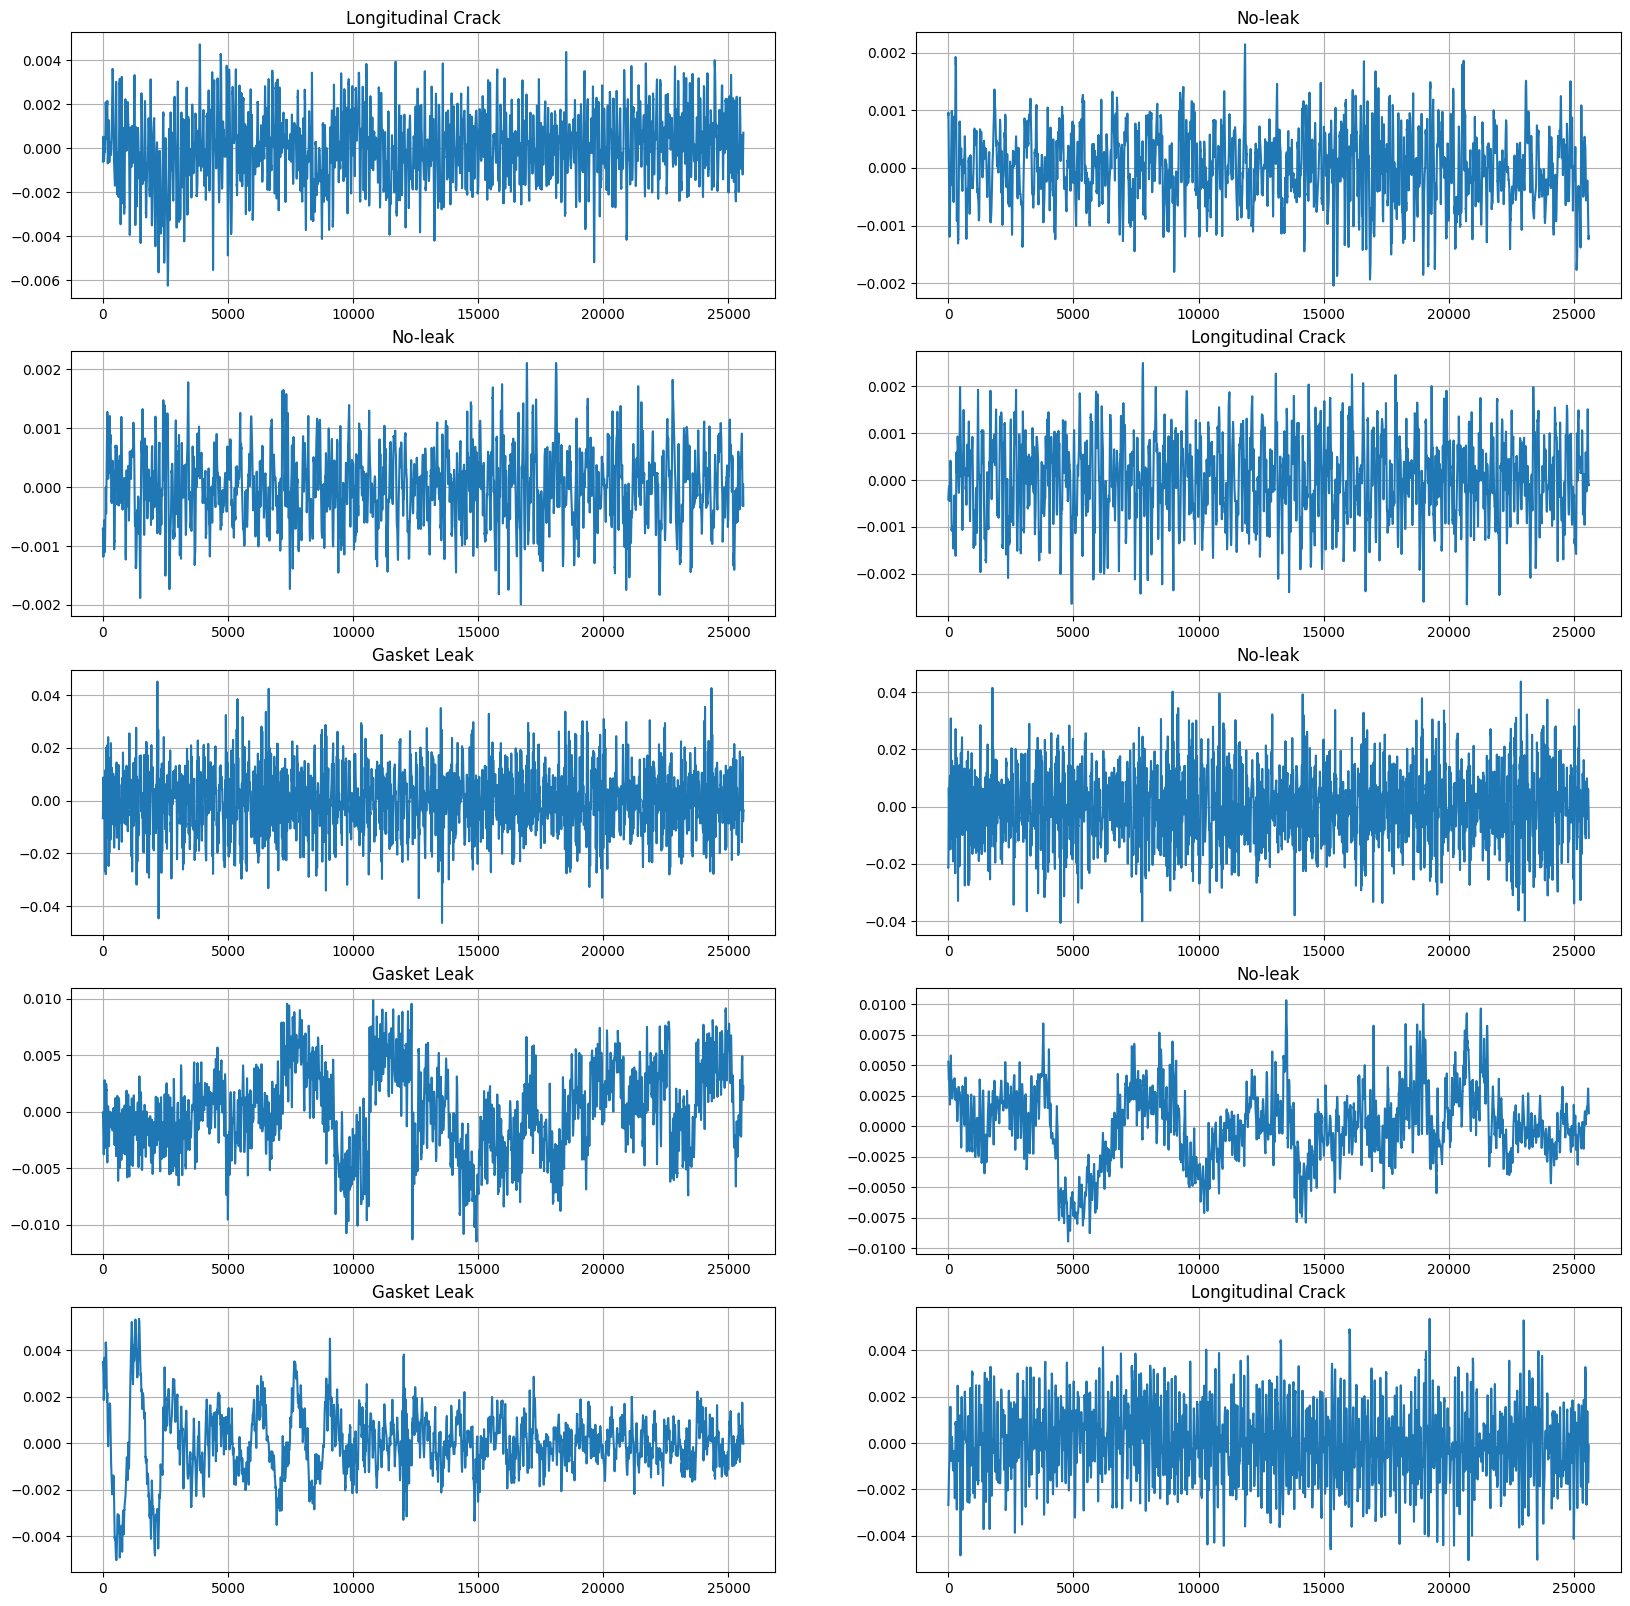

In [ ]:
def wavelet_denoise(signals_dict, labels_dict):

  # Create an object of the WaveletDenoising class
  wd = WaveletDenoising(normalize=True,
                      wavelet='sym3',
                      level=4,
                      thr_mode='soft',
                      method="universal")

  # Create a new dictionary to store the computed coefficients:
  wavelet_denoised_signals = {'training': [], 'testing': []}

  for key, signals_subset in signals_dict.items():
        for signal_element in signals_subset:

            # Denoise the signal using the wavelet denoising method
            denoised_signal = wd.fit(signal_element)

            # Store the computed scattering coeffs in the new dictionary
            wavelet_denoised_signals[key].append(denoised_signal)

  return wavelet_denoised_signals, labels_dict

# Denoise signals in the train, validation and testing dictionaries
wavelet_denoised_signals_dict, labels_dict = wavelet_denoise(signals_dict=signals_dict, labels_dict=labels_dict)

# Print information about the resulting dataset:
print (f'Number of signals (training, testing): ({len(wavelet_denoised_signals_dict["training"])}, {len(wavelet_denoised_signals_dict["testing"])})')
print (f'Number of labels (training, testing): ({len(labels_dict["training"])}, {len(labels_dict["testing"])})')
print (f'Number of samples per signal: {len(wavelet_denoised_signals_dict["training"][np.random.randint(0,len(wavelet_denoised_signals_dict["training"]))])}')

# Plot some of the resulting signals
plt.figure(figsize=(20, 20))
rows = 5
cols = 2
n = rows * cols

for i in range(n):
  plt.subplot(rows, cols, i+1)
  #random_index = np.random.randint(0,len(wavelet_denoised_signals_dict['training']))
  plt.plot(wavelet_denoised_signals_dict['training'][random_index[i]])
  plt.title(list(label_codes_dict.keys())[list(label_codes_dict.values()).index(labels_dict['training'][random_index[i]])])
  plt.grid()

# Extract features using the Continuous Wavelet Transform (CWT)

## Función para calcular los escalogramas

In [ ]:
def get_cwt_features(signals, labels, fs=25600,
                     f0=1.0,f1=fs/2,fn=13,nthreads=1,scaling="log",
                     fast=True,norm=False, segment_size=512):
    """
    Calcula características CWT para señales dividiéndolas en segmentos y computando escalogramas.

    Args:
        signals: Lista de señales a procesar
        labels: Lista de etiquetas correspondientes
        fs: Frecuencia de muestreo en Hz
        segment_size: Tamaño de cada segmento en muestras

    Returns:
        scalograms: Lista de escalogramas
        segment_labels: Lista de etiquetas para cada escalograma
    """
    from fcwt.boilerplate import cwt  # Importar la función cwt
    from tqdm import tqdm       # Para mostrar barra de progreso

    scalograms = []
    segment_labels = []

    # Iterar por cada señal y su etiqueta con una barra de progreso
    for i, (signal, label) in enumerate(tqdm(zip(signals, labels), total=len(signals), desc="Calculando CWT")):
        # Calcular cuántos segmentos podemos extraer de esta señal
        num_segments = len(signal) // segment_size

        # Procesar cada segmento
        for j in range(num_segments):
            # Extraer segmento
            segment = signal[j*segment_size:(j+1)*segment_size]

            # Calcular CWT
            freqs,fcwt_output = cwt(segment,fs,f0,f1,fn,nthreads,scaling,fast,norm)

            # Calcular escalograma y trasponer
            fcwt_scalogram = np.square(np.abs(fcwt_output)).T

            # Almacenar resultados
            scalograms.append(fcwt_scalogram)
            segment_labels.append(label)

    return scalograms, segment_labels

## Función para visualizar los escalogramas

In [ ]:
def plot_cwt_scalograms(scalograms, labels, label_codes_dict, num_per_class=2):
    """
    Visualiza escalogramas representativos para cada clase usando pcolormesh.

    Args:
        scalograms: Lista de escalogramas
        labels: Lista de etiquetas correspondientes
        label_codes_dict: Diccionario que mapea códigos a nombres de etiquetas
        num_per_class: Número de escalogramas a mostrar por clase
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm

    # Parámetros para graficar
    fs = 25600  # Frecuencia de muestreo
    segment_size = 512  # Tamaño del segmento
    t_duration = segment_size / fs  # Duración del segmento en segundos

    # Obtener etiquetas únicas
    unique_labels = np.unique(labels)

    # Calcular distribución de subplots
    num_classes = len(unique_labels)
    total_plots = num_classes * num_per_class
    rows = int(np.ceil(total_plots / 3))  # Máximo 3 columnas
    cols = min(3, total_plots)

    # Crear figura
    plt.figure(figsize=(15, 4*rows))

    # Índice actual del subplot
    plot_idx = 1

    # Para cada clase de etiqueta
    for label_code in unique_labels:
        # Encontrar índices donde aparece esta etiqueta
        class_indices = [i for i, l in enumerate(labels) if l == label_code]

        # Seleccionar índices aleatorios si tenemos suficientes muestras
        import random
        if len(class_indices) >= num_per_class:
            selected_indices = random.sample(class_indices, num_per_class)
        else:
            selected_indices = class_indices

        # Graficar escalogramas seleccionados
        for idx in selected_indices:
            # Obtener escalograma
            scalogram = np.array(scalograms[idx])

            # Dimensiones del escalograma
            num_freqs, num_times = scalogram.shape

            # Crear ejes de tiempo y frecuencia
            t = np.linspace(0, t_duration, num_times)

            # Crear eje de frecuencia logarítmico (de mayor a menor)
            f0 = 1.0  # Frecuencia mínima
            f1 = fs/2  # Frecuencia máxima (Nyquist)
            freqs = np.geomspace(f1, f0, num_freqs)

            # Crear subplot
            ax = plt.subplot(rows, cols, plot_idx)

            # Graficar usando pcolormesh
            pcm = ax.pcolormesh(t, freqs, scalogram, shading='auto')

            # Configurar escala logarítmica para frecuencias
            ax.set_yscale('log')

            # Obtener nombre de etiqueta
            label_name = list(label_codes_dict.keys())[list(label_codes_dict.values()).index(label_code)]

            # Configurar títulos y etiquetas
            ax.set_title(f"{label_name}")
            ax.set_xlabel('Tiempo (s)')
            ax.set_ylabel('Frecuencia (Hz)')

            # Añadir barra de colores
            plt.colorbar(pcm, ax=ax, label='Energía')

            # Incrementar índice de subplot
            plot_idx += 1

    plt.tight_layout()
    plt.show()

# Función para calcular promedios temporales de escalogramas

In [ ]:
def get_cwt_averaged_features(signals, labels, fs=25600,
                             f0=1.0, f1=fs/2, fn=13, nthreads=1, scaling="log",
                             fast=True, norm=False, segment_size=512):
    """
    Calcula características CWT promediadas temporalmente para cada escala.

    Args:
        signals: Lista de señales a procesar
        labels: Lista de etiquetas correspondientes
        fs: Frecuencia de muestreo en Hz
        segment_size: Tamaño de cada segmento en muestras

    Returns:
        averaged_features: Lista de vectores de características (promedios temporales)
        segment_labels: Lista de etiquetas correspondientes
    """
    from fcwt.boilerplate import cwt
    from tqdm import tqdm
    import numpy as np

    averaged_features = []
    segment_labels = []

    # Iterar por cada señal y su etiqueta
    for i, (signal, label) in enumerate(tqdm(zip(signals, labels), total=len(signals), desc="Calculando CWT promediado")):
        # Calcular cuántos segmentos podemos extraer de esta señal
        num_segments = len(signal) // segment_size

        # Procesar cada segmento
        for j in range(num_segments):
            # Extraer segmento
            segment = signal[j*segment_size:(j+1)*segment_size]

            # Calcular CWT
            freqs, fcwt_output = cwt(segment, fs, f0, f1, fn, nthreads, scaling, fast, norm)

            # Calcular escalograma
            fcwt_scalogram = np.square(np.abs(fcwt_output))

            # Calcular promedio a lo largo del eje temporal (axis=1)
            # Cada escala se promedia en el tiempo
            temporal_avg = np.mean(fcwt_scalogram, axis=1)

            # Almacenar resultados
            averaged_features.append(temporal_avg)
            segment_labels.append(label)

    return averaged_features, segment_labels

## Generando el dataset

In [ ]:
# Generar escalogramas para datos de entrenamiento
train_scalograms, train_labels = get_cwt_features(
    signals_dict['training'],
    labels_dict['training']
)

# Generar escalogramas para datos de prueba
test_scalograms, test_labels = get_cwt_features(
    signals_dict['testing'],
    labels_dict['testing']
)

# Función para visualizar las características promediadas

In [ ]:
def plot_cwt_averaged_features(averaged_features, labels, label_codes_dict, fs=25600, num_per_class=3):
    """
    Visualiza las características de CWT promediadas temporalmente por clase.

    Args:
        averaged_features: Lista de vectores de características (promedios temporales)
        labels: Lista de etiquetas correspondientes
        label_codes_dict: Diccionario que mapea códigos a nombres de etiquetas
        fs: Frecuencia de muestreo
        num_per_class: Número de ejemplos a mostrar por clase
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Obtener etiquetas únicas
    unique_labels = np.unique(labels)

    # Crear figura
    fig, axes = plt.subplots(len(unique_labels), num_per_class, figsize=(15, 3*len(unique_labels)))

    # Para cada clase
    for i, label_code in enumerate(unique_labels):
        # Encontrar ejemplos de esta clase
        class_indices = [idx for idx, label in enumerate(labels) if label == label_code]

        # Seleccionar algunos ejemplos aleatorios
        import random
        selected_indices = random.sample(class_indices, min(num_per_class, len(class_indices)))

        # Obtener nombre de la clase
        class_name = list(label_codes_dict.keys())[list(label_codes_dict.values()).index(label_code)]

        # Graficar cada ejemplo
        for j, idx in enumerate(selected_indices):
            # Crear eje de frecuencia logarítmico
            f0 = 1.0  # Frecuencia mínima
            f1 = fs/2  # Frecuencia máxima (Nyquist)
            fn = len(averaged_features[idx])  # Número de escalas
            freqs = np.geomspace(f1, f0, fn)

            ax = axes[i, j] if len(unique_labels) > 1 else axes[j]
            ax.plot(freqs, averaged_features[idx], 'o-')
            ax.set_xscale('log')
            ax.set_xlabel('Frecuencia (Hz)')
            ax.set_ylabel('Energía promedio')
            ax.set_title(f"{class_name} - Ejemplo {j+1}")
            ax.grid(True)

    plt.tight_layout()
    plt.show()

    # También mostrar la media por clase
    plt.figure(figsize=(10, 6))

    # Para cada clase
    for label_code in unique_labels:
        # Encontrar todos los ejemplos de esta clase
        class_indices = [idx for idx, label in enumerate(labels) if label == label_code]

        # Calcular promedio de todas las características para esta clase
        class_features = np.array([averaged_features[idx] for idx in class_indices])
        class_mean = np.mean(class_features, axis=0)
        class_std = np.std(class_features, axis=0)

        # Obtener nombre de la clase
        class_name = list(label_codes_dict.keys())[list(label_codes_dict.values()).index(label_code)]

        # Crear eje de frecuencia logarítmico
        f0 = 1.0  # Frecuencia mínima
        f1 = fs/2  # Frecuencia máxima (Nyquist)
        fn = len(averaged_features[0])  # Número de escalas
        freqs = np.geomspace(f1, f0, fn)

        # Graficar
        plt.plot(freqs, class_mean, 'o-', label=class_name)
        plt.fill_between(freqs, class_mean - class_std, class_mean + class_std, alpha=0.3)

    plt.xscale('log')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Energía promedio')
    plt.title('Energía promedio por clase a través de las escalas')
    plt.legend()
    plt.grid(True)
    plt.show()

# Función para guardar el dataset de características promediadas

In [ ]:
def save_averaged_dataset_to_h5(train_features, train_labels, test_features, test_labels,
                               label_codes_dict, file_path='accelerometer_cwt_averaged_features.h5'):
    """
    Procesa y guarda las características promediadas en un archivo HDF5.

    Args:
        train_features: Lista de características promediadas de entrenamiento
        train_labels: Lista de etiquetas de entrenamiento
        test_features: Lista de características promediadas de prueba
        test_labels: Lista de etiquetas de prueba
        label_codes_dict: Diccionario de códigos de etiquetas
        file_path: Ruta donde guardar el archivo HDF5
    """
    import h5py
    import numpy as np
    import json

    print("Procesando el dataset de características promediadas...")

    # Convertir a arrays numpy
    print("Convirtiendo listas a arrays numpy...")
    x_train = np.array(train_features)
    y_train = np.array(train_labels)
    x_test = np.array(test_features)
    y_test = np.array(test_labels)

    # Normalizar las características usando el máximo del conjunto de entrenamiento
    print("Normalizando las características...")
    max_val = np.max(x_train)
    print(f"Valor máximo para normalización: {max_val}")
    x_train = x_train / max_val
    x_test = x_test / max_val

    # One-hot encoding de las etiquetas
    print("Aplicando one-hot encoding a las etiquetas...")
    num_classes = len(label_codes_dict)
    y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)

    print(f"Formas después del procesamiento:")
    print(f"x_train: {x_train.shape}")
    print(f"y_train_onehot: {y_train_onehot.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test_onehot: {y_test_onehot.shape}")

    # Guardar en formato HDF5
    print(f"Guardando dataset en {file_path}...")
    with h5py.File(file_path, 'w') as hf:
        # Crear grupos para training y testing
        train_group = hf.create_group('train')
        test_group = hf.create_group('test')

        # Guardar características y etiquetas procesadas
        train_group.create_dataset('features', data=x_train)
        train_group.create_dataset('labels', data=y_train)
        train_group.create_dataset('labels_onehot', data=y_train_onehot)

        test_group.create_dataset('features', data=x_test)
        test_group.create_dataset('labels', data=y_test)
        test_group.create_dataset('labels_onehot', data=y_test_onehot)

        # Guardar metadatos
        metadata = hf.create_group('metadata')
        metadata.create_dataset('num_classes', data=num_classes)
        metadata.create_dataset('num_features', data=x_train.shape[1])
        metadata.create_dataset('max_val', data=max_val)

        # Guardar diccionario de etiquetas
        label_codes_json = json.dumps({k: int(v) for k, v in label_codes_dict.items()})
        metadata.attrs['label_codes_dict'] = label_codes_json

    print(f"Dataset de características promediadas guardado en {file_path}")

    # Copiar a Google Drive si estamos en Colab
    try:
        destination_folder = "/content/drive/MyDrive/Tesis/Accelerometer_Dataset"
        print(f"Copiando archivo a {destination_folder}...")
        !mkdir -p {destination_folder}
        !cp {file_path} {destination_folder}/
        print(f"Archivo copiado a: {destination_folder}/{file_path}")
    except:
        print("No se pudo realizar la copia o no estamos en un entorno Colab")

## Visualizar el dataset

In [ ]:
# Visualizar escalogramas representativos (2 por clase)
plot_cwt_scalograms(
    train_scalograms,
    train_labels,
    label_codes_dict,
    num_per_class=2
)

## Función para mezclar los escalogramas manteniendo la coherencia

In [ ]:
def shuffle_completely(scalograms, labels):
    """
    Mezcla completamente todas las muestras de escalogramas y sus etiquetas correspondientes,
    manteniendo la correspondencia entre cada escalograma y su etiqueta.

    Args:
        scalograms: Lista de escalogramas
        labels: Lista de etiquetas correspondientes

    Returns:
        shuffled_scalograms: Lista completamente mezclada de escalogramas
        shuffled_labels: Lista mezclada de etiquetas correspondientes
    """
    import numpy as np

    # Crear índices para todos los escalogramas
    indices = np.arange(len(scalograms))

    # Mezclar estos índices
    np.random.shuffle(indices)

    # Crear listas para almacenar los resultados mezclados
    shuffled_scalograms = [scalograms[i] for i in indices]
    shuffled_labels = [labels[i] for i in indices]

    return shuffled_scalograms, shuffled_labels

## Mezclando el dataset

In [ ]:
# Mezclar completamente los escalogramas de entrenamiento y prueba
shuffled_train_scalograms, shuffled_train_labels = shuffle_completely(
    train_scalograms,
    train_labels
)

shuffled_test_scalograms, shuffled_test_labels = shuffle_completely(
    test_scalograms,
    test_labels
)

print(f"Total de escalogramas de entrenamiento mezclados: {len(shuffled_train_scalograms)}")
print(f"Total de escalogramas de prueba mezclados: {len(shuffled_test_scalograms)}")

# Visualizar algunos ejemplos para verificar la mezcla
plot_cwt_scalograms(
    shuffled_train_scalograms[:300],
    shuffled_train_labels[:300],
    label_codes_dict,
    num_per_class=2
)

#  Guardar el dataset procesado en formato HDF5

## Funcion para guardar el dataset


In [ ]:
def save_processed_dataset_to_h5(train_scalograms, train_labels, test_scalograms, test_labels,
                                label_codes_dict, file_path='accelerometer_cwt_dataset_processed.h5'):
    """
    Procesa y guarda los escalogramas y etiquetas en un archivo HDF5.

    Args:
        train_scalograms: Lista de escalogramas de entrenamiento ya mezclados
        train_labels: Lista de etiquetas de entrenamiento ya mezcladas
        test_scalograms: Lista de escalogramas de prueba ya mezclados
        test_labels: Lista de etiquetas de prueba ya mezcladas
        label_codes_dict: Diccionario de códigos de etiquetas
        file_path: Ruta donde guardar el archivo HDF5
    """
    import h5py
    import numpy as np

    print("Procesando el dataset...")

    # 1. Convertir a arrays numpy
    print("Convirtiendo listas a arrays numpy...")
    x_train = np.array(train_scalograms)
    y_train = np.array(train_labels)
    x_test = np.array(test_scalograms)
    y_test = np.array(test_labels)

    # 2. Normalizar los escalogramas usando el máximo de entrenamiento
    print("Normalizando los escalogramas...")
    max_val = np.max(x_train)
    print(f"Valor máximo para normalización: {max_val}")
    x_train = x_train / max_val
    x_test = x_test / max_val

    # 3. Expandir dimensión para canal (necesario para CNN)
    print("Expandiendo dimensión para canal...")
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)

    # 4. One-hot encoding de las etiquetas
    print("Aplicando one-hot encoding a las etiquetas...")
    num_classes = len(label_codes_dict)  # Usar número de clases del diccionario
    y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)

    print(f"Formas después del procesamiento:")
    print(f"x_train: {x_train.shape}")
    print(f"y_train_onehot: {y_train_onehot.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test_onehot: {y_test_onehot.shape}")

    # Guardar en formato HDF5
    print(f"Guardando dataset en {file_path}...")
    with h5py.File(file_path, 'w') as hf:
        # Crear grupos para training y testing
        train_group = hf.create_group('train')
        test_group = hf.create_group('test')

        # Guardar escalogramas y etiquetas procesados
        train_group.create_dataset('scalograms', data=x_train)
        train_group.create_dataset('labels', data=y_train)  # Etiquetas originales
        train_group.create_dataset('labels_onehot', data=y_train_onehot)  # Etiquetas one-hot

        test_group.create_dataset('scalograms', data=x_test)
        test_group.create_dataset('labels', data=y_test)  # Etiquetas originales
        test_group.create_dataset('labels_onehot', data=y_test_onehot)  # Etiquetas one-hot

        # Guardar metadatos
        metadata = hf.create_group('metadata')
        metadata.create_dataset('num_classes', data=num_classes)
        metadata.create_dataset('shape', data=np.array(x_train.shape[1:]))  # Forma de cada escalograma con canal
        metadata.create_dataset('max_val', data=max_val)  # Guardar valor máximo usado en normalización

        # Guardar diccionario de etiquetas
        import json
        label_codes_json = json.dumps({k: int(v) for k, v in label_codes_dict.items()})
        metadata.attrs['label_codes_dict'] = label_codes_json

    print(f"Dataset procesado y guardado en {file_path}")
    print(f"Datos de entrenamiento: {len(x_train)} muestras")
    print(f"Datos de prueba: {len(x_test)} muestras")

    # Copiar a Google Drive si estamos en Colab
    try:
        destination_folder = "/content/drive/MyDrive/Tesis/Accelerometer_Dataset"
        print(f"Copiando archivo a {destination_folder}...")
        !mkdir -p {destination_folder}
        !cp accelerometer_cwt_dataset_ns1024_processed.h5 {destination_folder}/
        print(f"Archivo copiado a: {destination_folder}/accelerometer_cwt_dataset_ns1024_processed.h5")
    except:
        print("No se pudo realizar la copia o no estamos en un entorno Colab")

# Generando y guardando ambos datasets

Generando dataset de escalogramas completos...


Calculando CWT: 100%|██████████| 240/240 [00:03<00:00, 69.26it/s]


Procesando el dataset...
Convirtiendo listas a arrays numpy...
Normalizando los escalogramas...
Valor máximo para normalización: 1404.814697265625
Expandiendo dimensión para canal...
Aplicando one-hot encoding a las etiquetas...
Formas después del procesamiento:
x_train: (48000, 512, 13, 1)
y_train_onehot: (48000, 5)
x_test: (12000, 512, 13, 1)
y_test_onehot: (12000, 5)
Guardando dataset en accelerometer_cwt_dataset_ns512_processed.h5...
Dataset procesado y guardado en accelerometer_cwt_dataset_ns512_processed.h5
Datos de entrenamiento: 48000 muestras
Datos de prueba: 12000 muestras
Copiando archivo a /content/drive/MyDrive/Tesis/Accelerometer_Dataset...
cp: cannot stat 'accelerometer_cwt_dataset_ns1024_processed.h5': No such file or directory
Archivo copiado a: /content/drive/MyDrive/Tesis/Accelerometer_Dataset/accelerometer_cwt_dataset_ns1024_processed.h5

Generando dataset de características promediadas temporalmente...


Calculando CWT promediado: 100%|██████████| 240/240 [00:03<00:00, 67.58it/s]


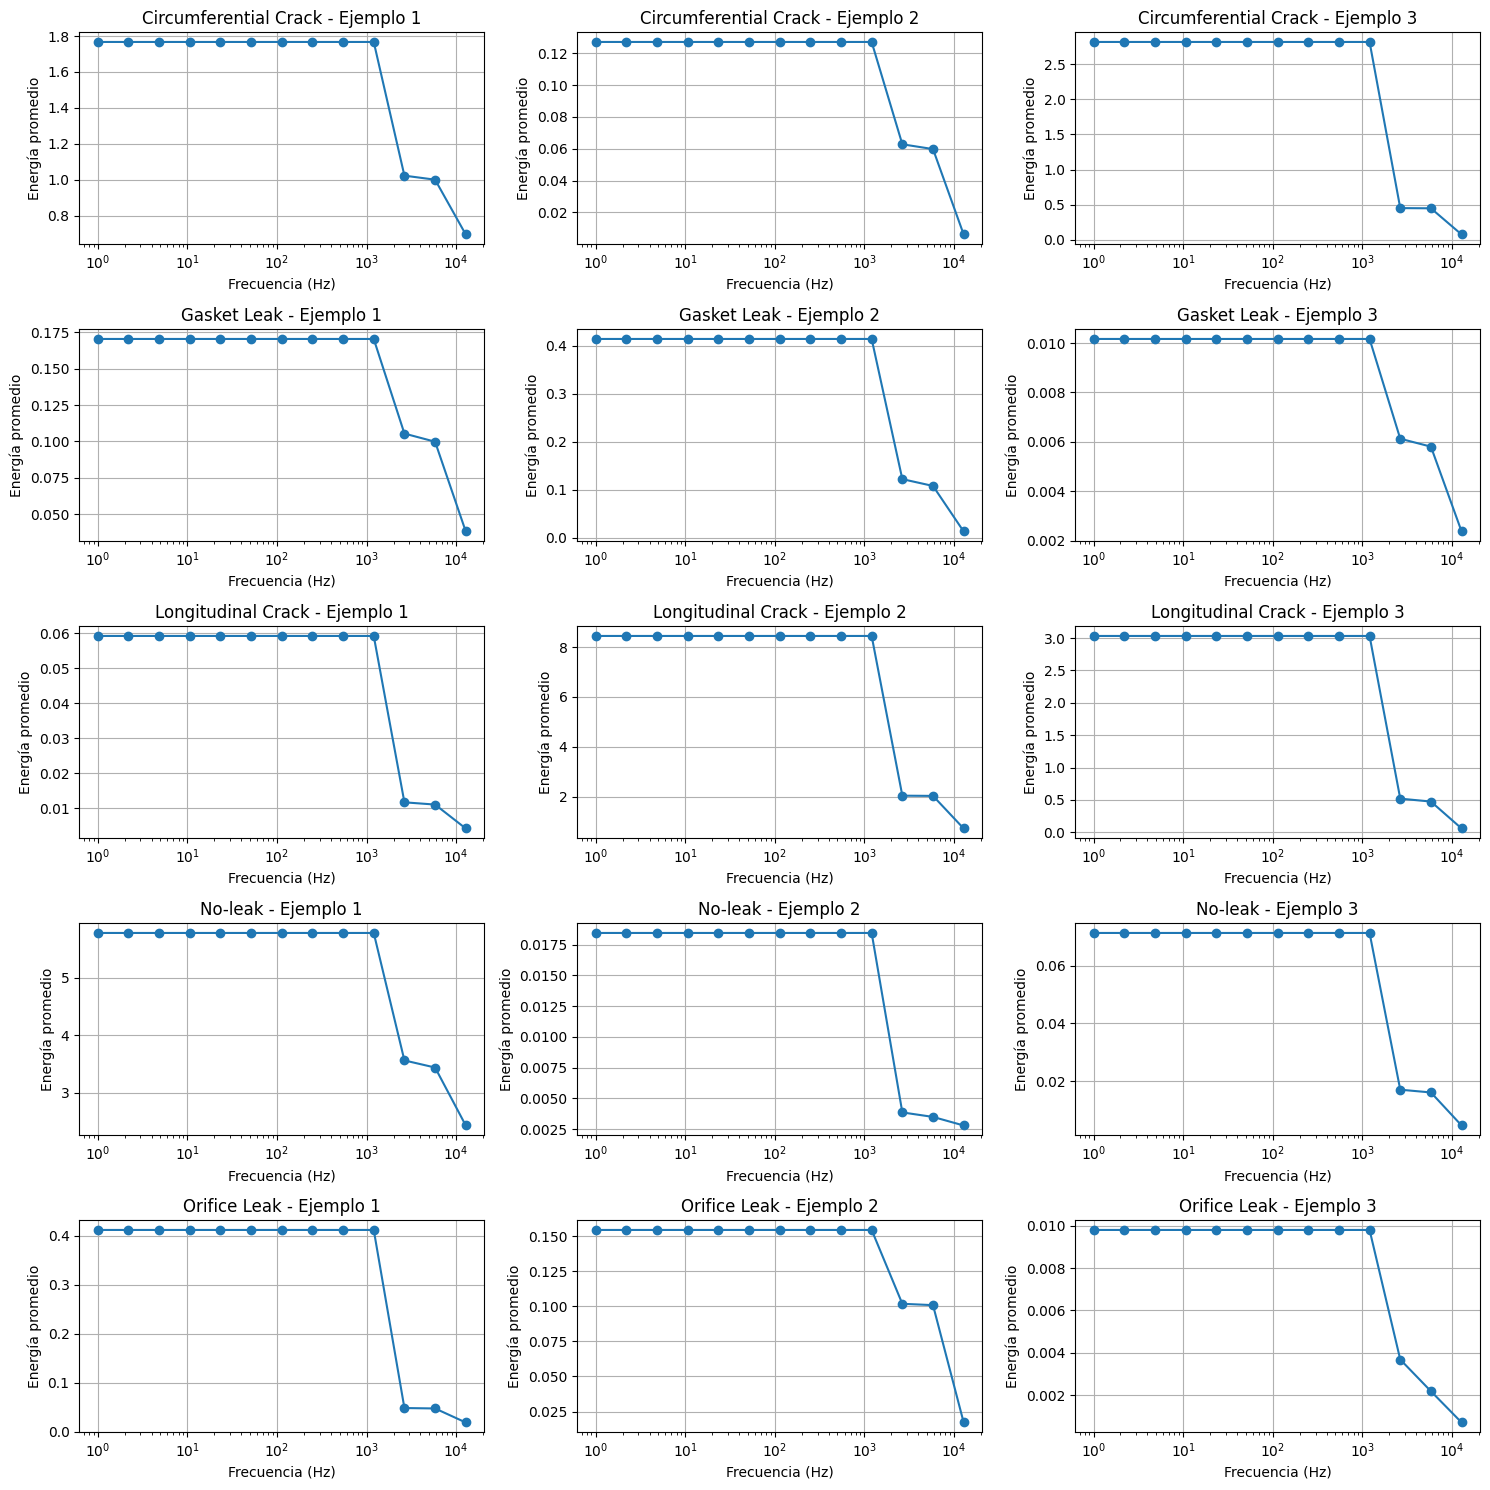

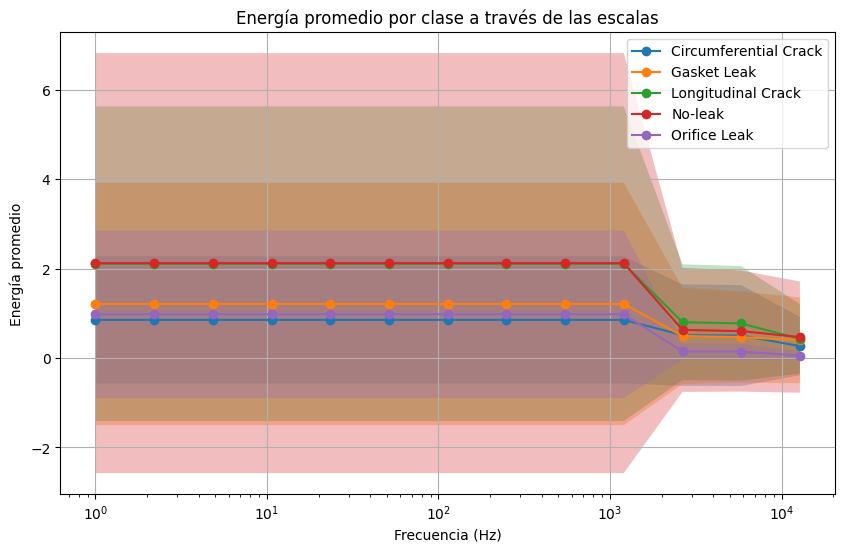

Procesando el dataset de características promediadas...
Convirtiendo listas a arrays numpy...
Normalizando las características...
Valor máximo para normalización: 1128.5992431640625
Aplicando one-hot encoding a las etiquetas...
Formas después del procesamiento:
x_train: (48000, 13)
y_train_onehot: (48000, 5)
x_test: (12000, 13)
y_test_onehot: (12000, 5)
Guardando dataset en accelerometer_cwt_averaged_ns512_processed.h5...
Dataset de características promediadas guardado en accelerometer_cwt_averaged_ns512_processed.h5
Copiando archivo a /content/drive/MyDrive/Tesis/Accelerometer_Dataset...
Archivo copiado a: /content/drive/MyDrive/Tesis/Accelerometer_Dataset/accelerometer_cwt_averaged_ns512_processed.h5


In [ ]:
# Generar el dataset original de escalogramas completos
print("Generando dataset de escalogramas completos...")
train_scalograms, train_labels = get_cwt_features(
    wavelet_denoised_signals_dict['training'],
    labels_dict['training']
)

test_scalograms, test_labels = get_cwt_features(
    wavelet_denoised_signals_dict['testing'],
    labels_dict['testing']
)

# Mezclar los datasets
shuffled_train_scalograms, shuffled_train_labels = shuffle_completely(train_scalograms, train_labels)
shuffled_test_scalograms, shuffled_test_labels = shuffle_completely(test_scalograms, test_labels)

# Guardar dataset de escalogramas completos
save_processed_dataset_to_h5(
    shuffled_train_scalograms,
    shuffled_train_labels,
    shuffled_test_scalograms,
    shuffled_test_labels,
    label_codes_dict,
    file_path='accelerometer_cwt_dataset_ns512_processed.h5'
)

# Generar el dataset de características promediadas
print("\nGenerando dataset de características promediadas temporalmente...")
train_avg_features, train_avg_labels = get_cwt_averaged_features(
    wavelet_denoised_signals_dict['training'],
    labels_dict['training']
)

test_avg_features, test_avg_labels = get_cwt_averaged_features(
    wavelet_denoised_signals_dict['testing'],
    labels_dict['testing']
)

# Mezclar los datasets de características promediadas
shuffled_train_avg, shuffled_train_avg_labels = shuffle_completely(train_avg_features, train_avg_labels)
shuffled_test_avg, shuffled_test_avg_labels = shuffle_completely(test_avg_features, test_avg_labels)

# Visualizar las características promediadas
plot_cwt_averaged_features(shuffled_train_avg[:100], shuffled_train_avg_labels[:100], label_codes_dict)

# Guardar dataset de características promediadas
save_averaged_dataset_to_h5(
    shuffled_train_avg,
    shuffled_train_avg_labels,
    shuffled_test_avg,
    shuffled_test_avg_labels,
    label_codes_dict,
    file_path='accelerometer_cwt_averaged_ns512_processed.h5'
)